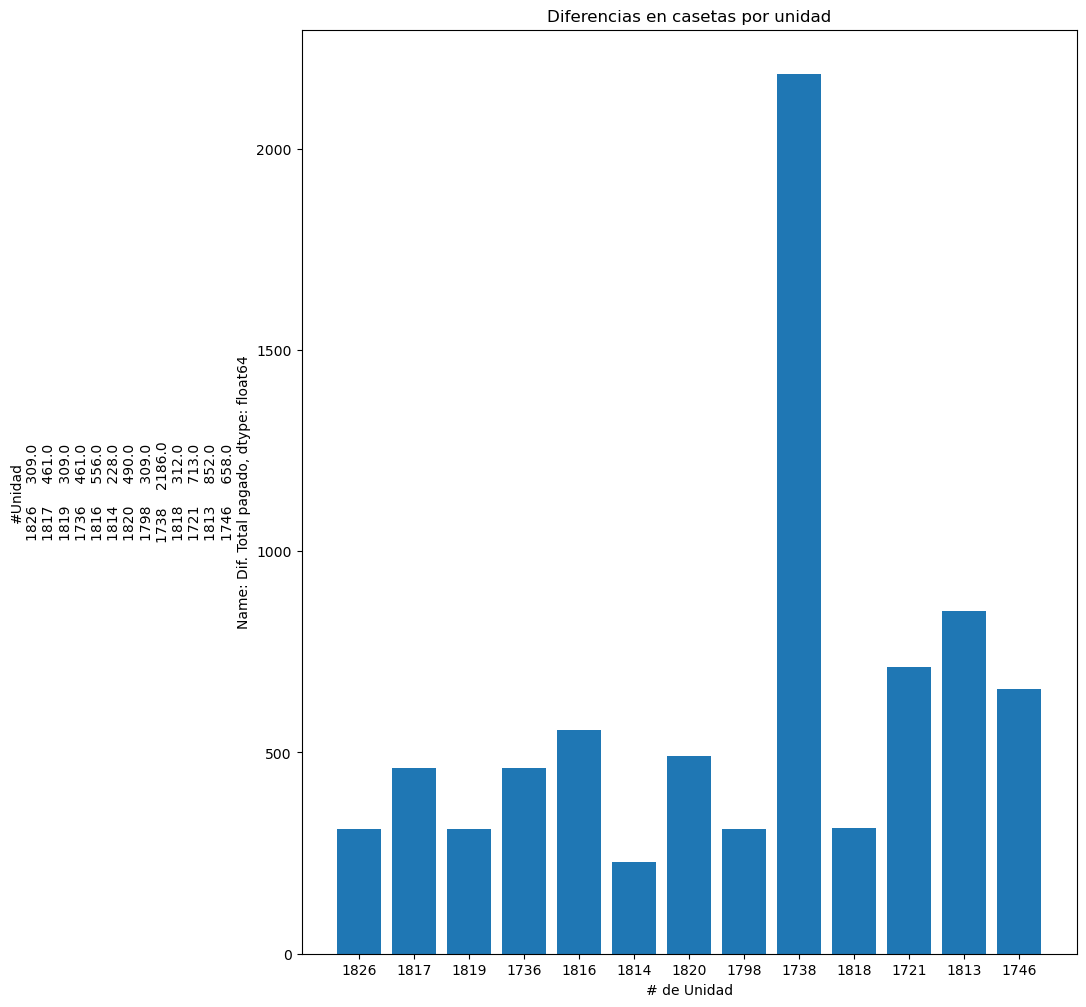

In [5]:
from dash import Dash, html, dcc, Input, Output  # pip install dash
import dash_bootstrap_components as dbc
from vega_datasets import data             # pip install vega-datasets
import pandas as pd
import numpy as np

import altair as alt                        # pip install altair

import matplotlib.pyplot as plt             # pip install matplotlib
import mpld3                                # pip install mpld3

from bokeh.plotting import figure           # pip install Bokeh
from bokeh.resources import CDN
from bokeh.embed import file_html
from bokeh.models import ColumnDataSource

# bring data into app
casetas = pd.read_excel('Casetas TDR.xlsx')
tlvia = pd.read_excel('Compilado televía 2.xlsx')
# print(cars.columns)

tlcount = tlvia[['TAG', 'Importe']].groupby('TAG').count()
cascount = casetas[['TAG', 'Costo Caseta']].groupby('TAG').count()
tlsum = tlvia[['TAG', 'Importe']].groupby('TAG').sum()
cassum = casetas[['TAG', 'Costo Caseta']].groupby('TAG').sum()
diffcount =  pd.DataFrame(tlcount['Importe'] - cascount['Costo Caseta'])
diffsum = pd.DataFrame(tlsum['Importe'] - cassum['Costo Caseta'])
diffsum = diffsum[diffsum != 0]
diffcount = diffcount[diffcount != 0]
diff = pd.merge(diffcount, diffsum, left_index=True, right_index=True)
diff.rename(columns = {'0_x':'Dif. Casetas pagadas', '0_y':'Dif. Total pagado'}, inplace = True)
tlvia.set_index('TAG', inplace=True)
diff2 = pd.merge(diff, tlvia, left_index=True, right_index=True)
diff2 = diff2[['#Unidad', 'Dif. Casetas pagadas', 'Dif. Total pagado']].dropna()
diff2.drop_duplicates(inplace=True)
diff2['#Unidad'] = diff2['#Unidad'].astype(str)
diff2.set_index('#Unidad', inplace=True)

In [22]:
import plotly.express as px

# Set up Dash app
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Set up the page layout
app.layout = html.Div([
    dcc.Dropdown(id='mydropdown',
        value=['Dif. Total pagado'],
        options=[{'label': i, 'value': i} for i in ['Dif. Casetas pagadas', 'Dif. Total pagado']]
    ),
    dcc.Graph(id="Barras")    
])

@app.callback(
    Output('Barras', 'figure'),
    Input('mydropdown', 'value'))

def bar_chart(spending):
    fig = px.bar(
        diff2,
        x=diff2.index,
        y=spending,
        barmode="group",
        title="Diferencia en casetas por unidad",
    )
    return fig

if __name__ == '__main__':
    app.run_server(debug=True, port='8004')


In [16]:
diff2.dtypes

Dif. Casetas pagadas    float64
Dif. Total pagado       float64
dtype: object

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[15], line 18, in bar_chart(spending='Dif. Total pagado')
     13 @app.callback(
     14     Output('Barras', 'figura'),
     15     Input('mydropdown', 'value'))
     16 
     17 def bar_chart(spending):
---> 18     fig = px.bar(
        diff2 =          Dif. Casetas pagadas  Dif. Total pagado
#Unidad                                         
1826                      1.0              309.0
1817                      2.0              461.0
1819                      1.0              309.0
1736                      2.0              461.0
1816                      2.0              556.0
1814                      1.0              228.0
1820                      2.0              490.0
1798                      1.0              309.0
1738                     15.0             2186.0
1818                      1.0              312.0
1721  